### This notebook does some basic exporatory data analysis for predicting mobile case theme 

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from __future__ import print_function,division
import cv2
from glob import glob
import os
import hashlib
import seaborn as sns
from scipy.misc import imresize
import re

In [2]:
HOME_DIR = os.getcwd()
basepath = HOME_DIR + '/data/mobile_theme/'

In [20]:
basepath

'C:\\Users\\RAVI TEJA\\Documents\\mobile_theme/data/mobile_theme/'

By manually seeing the images I've found a lot of images seem to be duplicate in the training set.Let's find out 

In [3]:
hashes = {}
labels = {}

print('computing md5 of training data:')

for base_dir in ['train']:
    print(base_dir)
    for fname in glob(basepath+base_dir+'/*/*.jpg'):
        labels[fname] = fname.split('/')[-2]
        h = hashlib.md5(open(fname,'rb').read()).digest()    
        if h in hashes:
            hashes[h].append(fname)
        else:
            hashes[h] = [fname]

print(len(hashes))            

computing md5 of training data:
train
4154


In [4]:
repeated = sum(1 for k,v in hashes.items() if len(v)>1)
print('files appearing more than once in train:{}'.format(repeated))

files appearing more than once in train:388


Since most of the deep learning algorithms use mini-batch learning, identical images with same labels may not have as 
-ve effect on the model as identical images with different labels

In [5]:
print('Identical files with different labels:')
for k,v in hashes.items():
    if len(v) > 1:
        c = set([labels[x] for x in v])
        if len(c) > 1:
            print(v,c)


Identical files with different labels:


seems like none of the identical files have different labels

In [11]:
max_k='temp';max_v=0
for k,v in hashes.items():
    if len(v) > max_v:
        max_v = len(v)
        max_k = k

print('Most number of duplicate images - {},{}'.format(max_k,max_v))

Most number of duplicate images - o��l[�:���K,4


let's make sure if they are identical

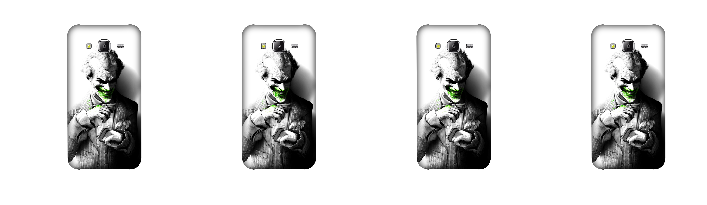

In [13]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')



plots([plt.imread(fname) for fname in hashes[max_k]])        

Let's explore the test set to check if there are any of them in the training set as well

In [18]:
leaks = []
for fname in glob(basepath+'test/*/*.jpg'):
    h = hashlib.md5(open(fname,'rb').read()).digest()
    if h in hashes:
        leaks.append((fname,hashes[h]))

print('Number of test images present in train:{}'.format(len(leaks)))        

Number of test images present in train:385


Let's have a look at some of the duplicate images

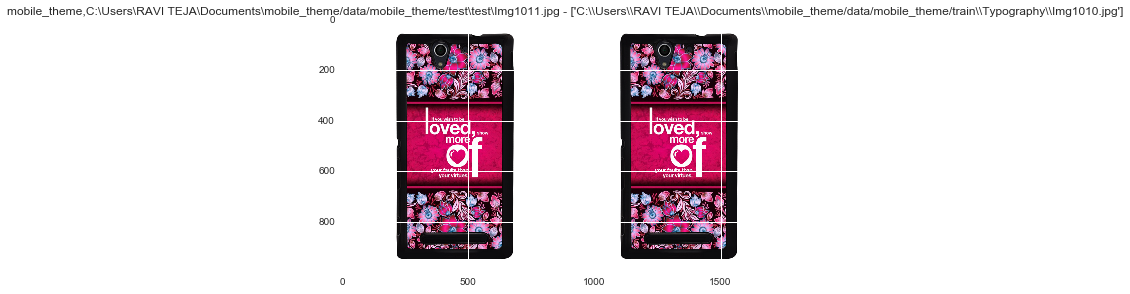

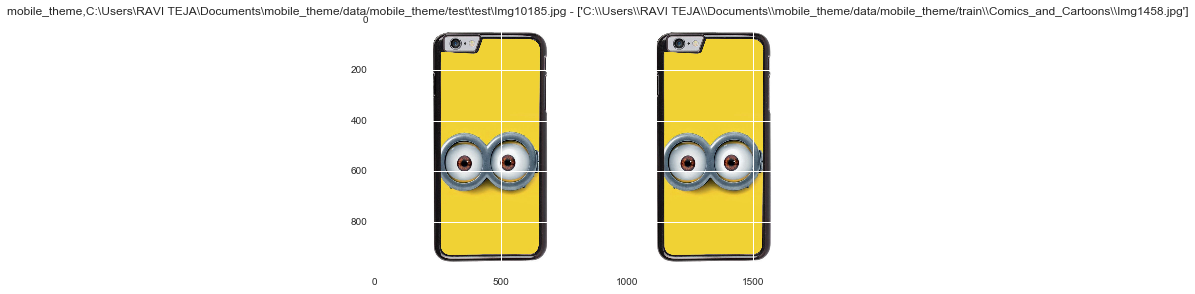

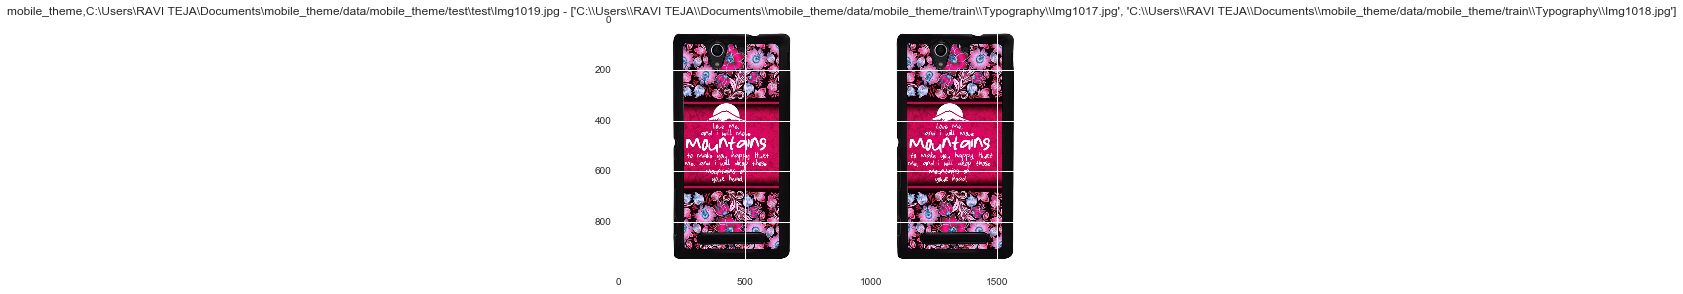

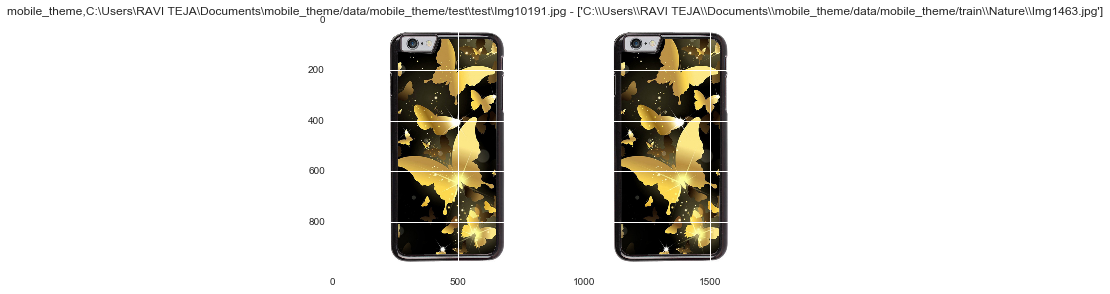

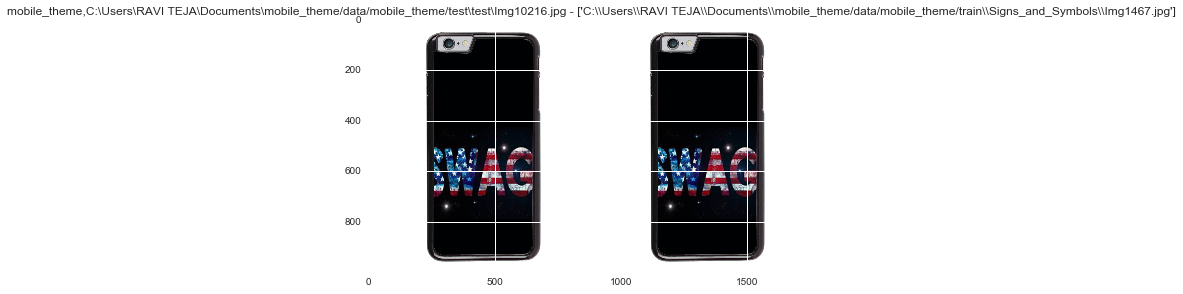

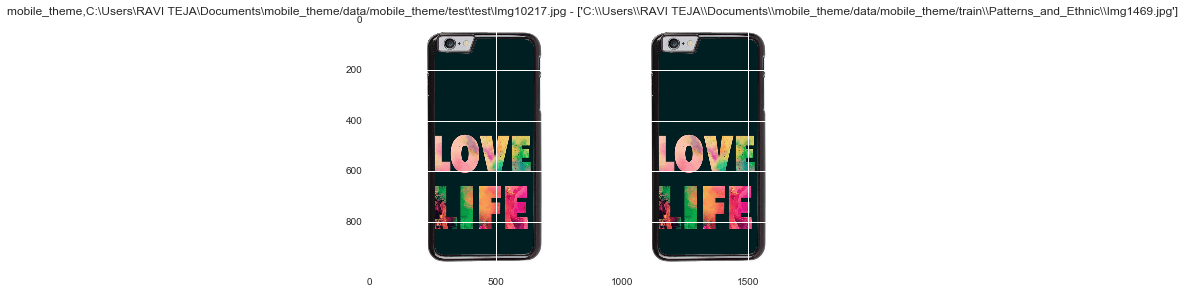

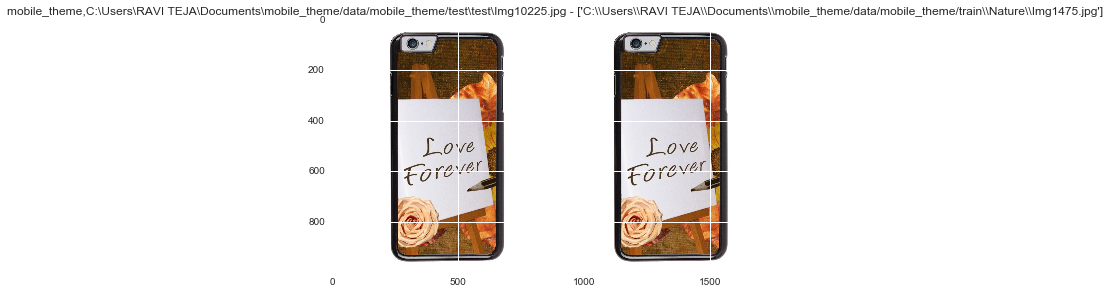

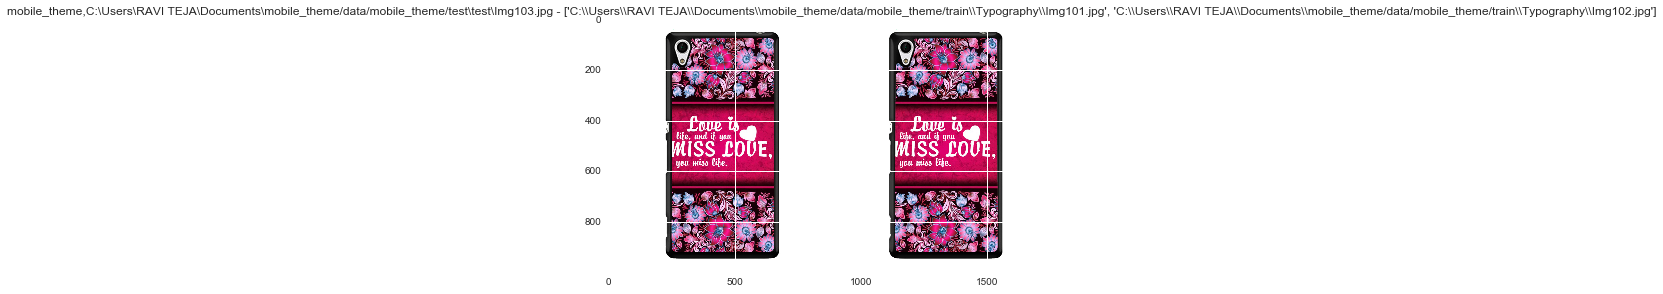

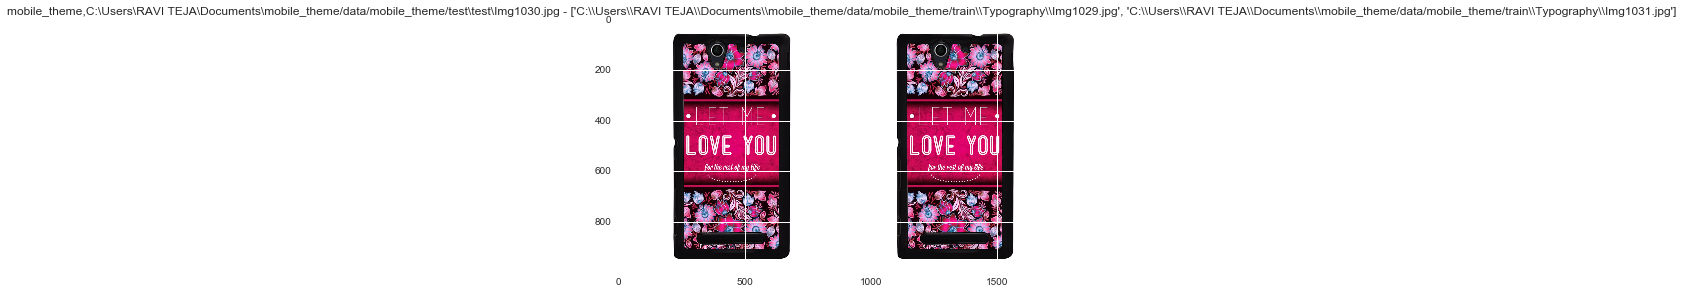

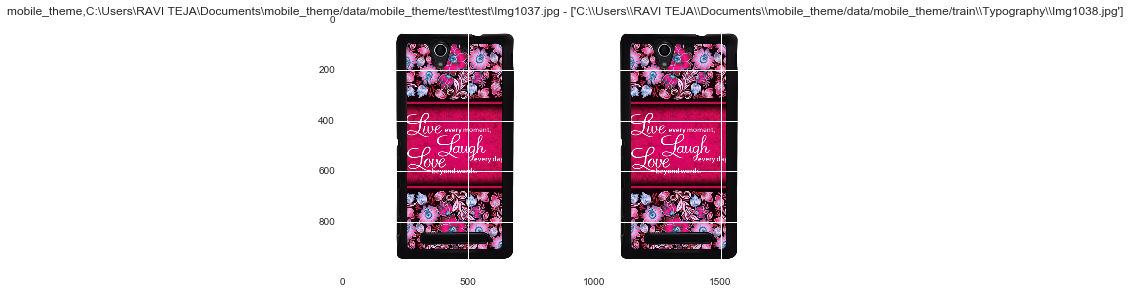

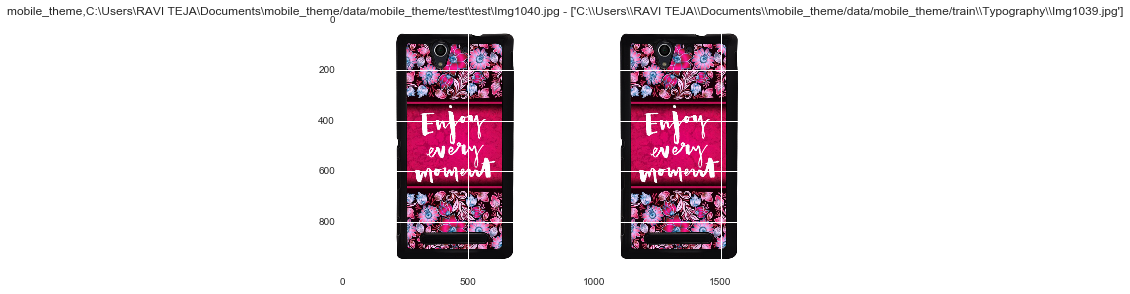

In [16]:
counter = 0
for t1,t2 in leaks:
    plt.figure()
    plt.title('{},{} - {}'.format(t2[0].split('/')[-2],t1,t2))
    plt.imshow(np.hstack([plt.imread(t1),plt.imread(t2[0])]))
    counter +=1
    if counter > 10:
        break


let's dig deep into the training set 

In [36]:
all_case_images = []

for path in sorted(glob(basepath+'train/*')):
    print('path is {}'.format(path))
    case_type = path.split('/')[-1]
    print('case type is {}'.format(case_type))
    case_images = sorted(glob(basepath+'train/'+case_type+'/*'))
    all_case_images = all_case_images + case_images
    
all_case_images = pd.DataFrame({'imagepath':all_case_images})
#all_case_images['filetype'] = all_case_images.apply(lambda row: row.imagepath.split('.')[-1],axis=1)
#all_case_images['type'] = all_case_images.apply(lambda row: row.imagepath.split('/')[-2],axis=1)
all_case_images.head(6)

path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Automobile
case type is train\Automobile
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Comics_and_Cartoons
case type is train\Comics_and_Cartoons
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Famous_Personalities
case type is train\Famous_Personalities
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Festivals_and_Occasions
case type is train\Festivals_and_Occasions
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Graffiti_and_Illustrations
case type is train\Graffiti_and_Illustrations
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Movies_and_TV_shows
case type is train\Movies_and_TV_shows
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Music
case type is train\Music
path is C:\Users\RAVI TEJA\Documents\mobile_theme/data/mobile_theme/train\Nature
case type 

,imagepath


In [39]:
re.split('\','yr9U9/OOU9BU\IBUB/JNON\IJB')

['yr9U9', 'OOU9BU\\IBUB', 'JNON\\IJB']